# DataScience

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel('./Career data_PDA_4053.xlsx')

In [5]:
df.head()

,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,...,Job Security,Career Change Interest,Skills Gap,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
0,Medicine,Business Analyst,48.0,Male,7.0,High School,High,7.0,10.0,83.0,...,8.0,0,8.0,0,0.0,1,2.0,0.0,1.0,0.0
1,Education,Economist,44.0,Male,26.0,Master's,Low,10.0,3.0,55.0,...,9.0,0,3.0,0,1.0,1,2.0,1.0,9.0,0.0
2,Education,Biologist,21.0,Female,27.0,Master's,NaN,8.0,3.0,78.0,...,4.0,0,4.0,0,0.0,0,2.0,1.0,2.0,0.0
3,Education,Business Analyst,33.0,Male,14.0,PhD,Medium,7.0,9.0,NaN,...,5.0,0,NaN,0,0.0,0,9.0,0.0,1.0,0.0
4,Arts,Doctor,28.0,Female,0.0,PhD,Low,3.0,1.0,8.0,...,3.0,0,5.0,0,1.0,0,2.0,0.0,7.0,1.0


In [6]:
df.shape

(5000, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Field of Study               4999 non-null   object 
 1   Current Occupation           4996 non-null   object 
 2   Age                          4996 non-null   float64
 3   Gender                       4993 non-null   object 
 4   Years of Experience          4998 non-null   float64
 5   Education Level              4994 non-null   object 
 6   Industry Growth Rate         4995 non-null   object 
 7   Job Satisfaction             4998 non-null   float64
 8   Work-Life Balance            4997 non-null   float64
 9   Job Opportunities            4993 non-null   float64
 10  Salary                       4994 non-null   object 
 11  Job Security                 4996 non-null   float64
 12  Career Change Interest       4995 non-null   object 
 13  Skills Gap        

In [8]:
df.describe()

,Age,Years of Experience,Job Satisfaction,Work-Life Balance,Job Opportunities,Job Security,Skills Gap,Freelancing Experience,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
count,4996.000000,4998.000000,4998.000000,4997.000000,4993.000000,4996.000000,4995.000000,4994.000000,4994.000000,4998.000000,4996.000000,4999.000000
mean,39.364892,19.774310,5.496399,5.521513,50.622672,5.523419,5.538739,0.150781,5.511414,0.995798,5.484588,0.570714
std,11.457086,11.527082,2.895880,2.901469,29.025295,2.876791,2.884482,0.357871,2.868290,0.818403,2.869529,0.495024
min,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,29.000000,10.000000,3.000000,3.000000,25.000000,3.000000,3.000000,0.000000,3.000000,0.000000,3.000000,0.000000
50%,40.000000,20.000000,6.000000,6.000000,50.000000,6.000000,6.000000,0.000000,6.000000,1.000000,5.000000,1.000000
75%,49.000000,30.000000,8.000000,8.000000,76.000000,8.000000,8.000000,0.000000,8.000000,2.000000,8.000000,1.000000
max,59.000000,39.000000,10.000000,10.000000,100.000000,10.000000,10.000000,1.000000,10.000000,2.000000,10.000000,1.000000


In [9]:
df[df['Current Occupation'].isnull()]

,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,...,Job Security,Career Change Interest,Skills Gap,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
48,Biology,NaN,29.0,Female,25.0,High School,Low,4.0,NaN,90.0,...,7.0,0,2.0,NaN,0.0,0,8.0,0.0,7.0,1.0
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Mechanical Engineering,NaN,36.0,Male,33.0,Bachelor's,Medium,2.0,2.0,90.0,...,2.0,0,8.0,0,1.0,0,5.0,2.0,1.0,1.0
1032,Economics,NaN,28.0,Female,6.0,Bachelor's,High,8.0,5.0,69.0,...,6.0,0,5.0,0,0.0,0,4.0,1.0,3.0,0.0


In [10]:
df.isnull().sum()

,0
Field of Study,1
Current Occupation,4
Age,4
Gender,7
Years of Experience,2
Education Level,6
Industry Growth Rate,5
Job Satisfaction,2
Work-Life Balance,3
Job Opportunities,7


In [11]:
columns = df.columns.tolist()

In [12]:
columns

['Field of Study',
 'Current Occupation',
 'Age',
 'Gender',
 'Years of Experience',
 'Education Level',
 'Industry Growth Rate',
 'Job Satisfaction',
 'Work-Life Balance',
 'Job Opportunities',
 'Salary',
 'Job Security',
 'Career Change Interest',
 'Skills Gap',
 'Certifications',
 'Freelancing Experience',
 'Geographic Mobility',
 'Professional Networks',
 'Career Change Events',
 'Technology Adoption',
 'Likely to Change Occupation']

In [13]:
for i in columns:
  print(f'No. of unique values in {i} : {df[i].nunique()}')

No. of unique values in Field of Study : 10
No. of unique values in Current Occupation : 10
No. of unique values in Age : 40
No. of unique values in Gender : 2
No. of unique values in Years of Experience : 40
No. of unique values in Education Level : 4
No. of unique values in Industry Growth Rate : 3
No. of unique values in Job Satisfaction : 10
No. of unique values in Work-Life Balance : 10
No. of unique values in Job Opportunities : 100
No. of unique values in Salary : 4930
No. of unique values in Job Security : 10
No. of unique values in Career Change Interest : 3
No. of unique values in Skills Gap : 10
No. of unique values in Certifications : 3
No. of unique values in Freelancing Experience : 2
No. of unique values in Geographic Mobility : 3
No. of unique values in Professional Networks : 10
No. of unique values in Career Change Events : 3
No. of unique values in Technology Adoption : 10
No. of unique values in Likely to Change Occupation : 2


In [14]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

print(f'Numerical Columns:\n{num_cols}\n')
print('-----------------------------------------------------------\n')
print(f'Categorical Columns:\n{cat_cols}')

Numerical Columns:
Index(['Age', 'Years of Experience', 'Job Satisfaction', 'Work-Life Balance',
       'Job Opportunities', 'Job Security', 'Skills Gap',
       'Freelancing Experience', 'Professional Networks',
       'Career Change Events', 'Technology Adoption',
       'Likely to Change Occupation'],
      dtype='object')

-----------------------------------------------------------

Categorical Columns:
Index(['Field of Study', 'Current Occupation', 'Gender', 'Education Level',
       'Industry Growth Rate', 'Salary', 'Career Change Interest',
       'Certifications', 'Geographic Mobility'],
      dtype='object')


In [15]:
import pandas as pd
import numpy as np
from scipy import stats

# Load dataset
df = pd.read_excel('Career data_PDA_4053.xlsx')

# Display basic information
print("Dataset Shape:", df.shape)
print("Data Types:\n", df.dtypes)
print("Missing Values:\n", df.isnull().sum())
print("Descriptive Statistics:\n", df.describe())


Dataset Shape: (5000, 21)
Data Types:
 Field of Study                  object
Current Occupation              object
Age                            float64
Gender                          object
Years of Experience            float64
Education Level                 object
Industry Growth Rate            object
Job Satisfaction               float64
Work-Life Balance              float64
Job Opportunities              float64
Salary                          object
Job Security                   float64
Career Change Interest          object
Skills Gap                     float64
Certifications                  object
Freelancing Experience         float64
Geographic Mobility             object
Professional Networks          float64
Career Change Events           float64
Technology Adoption            float64
Likely to Change Occupation    float64
dtype: object
Missing Values:
 Field of Study                 1
Current Occupation             4
Age                            4
Gender      

In [16]:
df_clean = df.copy()
df_clean['Salary'] = pd.to_numeric(df_clean['Salary'], errors='coerce')
df_clean['Career Change Interest'] = pd.to_numeric(df_clean['Career Change Interest'], errors='coerce')
df_clean['Certifications'] = pd.to_numeric(df_clean['Certifications'], errors='coerce')
df_clean['Geographic Mobility'] = pd.to_numeric(df_clean['Geographic Mobility'], errors='coerce')


In [17]:
# Numerical imputation with mean
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    if df_clean[col].isnull().sum() > 0:
        mean_val = df_clean[col].mean()
        df_clean[col].fillna(mean_val, inplace=True)

# Categorical imputation with mode
categorical_cols = df_clean.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df_clean[col].isnull().sum() > 0:
        mode_val = df_clean[col].mode()
        if len(mode_val) > 0:
            df_clean[col].fillna(mode_val, inplace=True)


In [18]:
# IQR-based outlier treatment
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean[col] = df_clean[col].clip(lower_bound, upper_bound)


In [19]:
# Correlation analysis
correlation_matrix = df_clean[['Age', 'Years of Experience', 'Job Satisfaction',
                                'Salary', 'Likely to Change Occupation']].corr()

# T-tests for career changers vs non-changers
changers = df_clean[df_clean['Likely to Change Occupation'] == 1]
non_changers = df_clean[df_clean['Likely to Change Occupation'] == 0]

t_stat, p_value = stats.ttest_ind(changers['Job Satisfaction'], non_changers['Job Satisfaction'])
print(f"Job Satisfaction T-test: t={t_stat:.4f}, p={p_value:.4e}")

# Chi-square test for categorical variables
from scipy.stats import chi2_contingency
contingency = pd.crosstab(df_clean['Education Level'], df_clean['Likely to Change Occupation'])
chi2, p_value, dof, expected = chi2_contingency(contingency)
print(f"Education Chi-square: χ²={chi2:.4f}, p={p_value:.4e}")


Job Satisfaction T-test: t=-52.8783, p=0.0000e+00
Education Chi-square: χ²=1.3384, p=7.2005e-01


In [20]:
def correlation_heatmap(df_clean):
    df_processed = df_clean
    numeric_cols = df_processed.select_dtypes(include=[np.number]).columns
    corr_matrix = df_processed[numeric_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()

In [21]:
def salary_boxplot_original():
    salaries = pd.to_numeric(df['Salary'], errors='coerce').dropna()
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=salaries, color='lightcoral')
    plt.title('Salary Boxplot (Original)')
    plt.xlabel('Salary')
    plt.tight_layout()
    plt.show()

In [22]:
def salary_boxplot_processed():
    df_processed = df_clean
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_processed['Salary'], color='lightseagreen')
    plt.title('Salary Boxplot (After Outlier Treatment)')
    plt.xlabel('Salary')
    plt.tight_layout()
    plt.show()

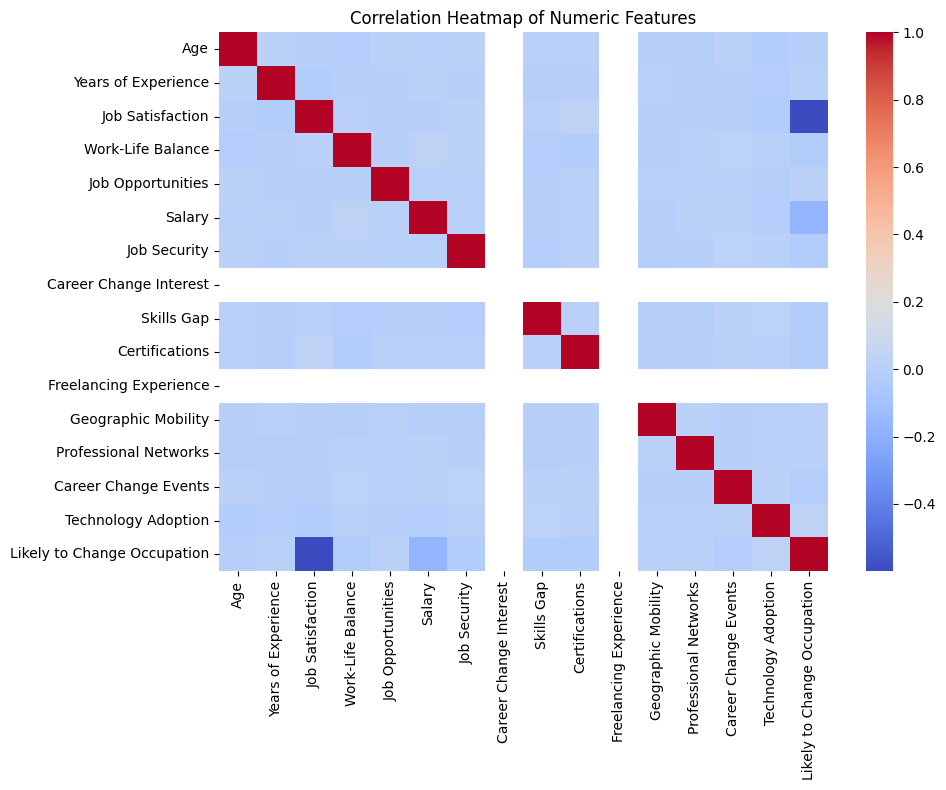

In [23]:
correlation_heatmap(df_clean)

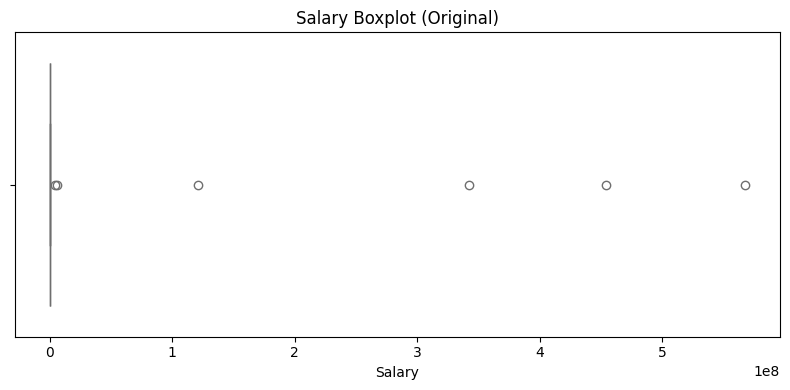

In [24]:
salary_boxplot_original()

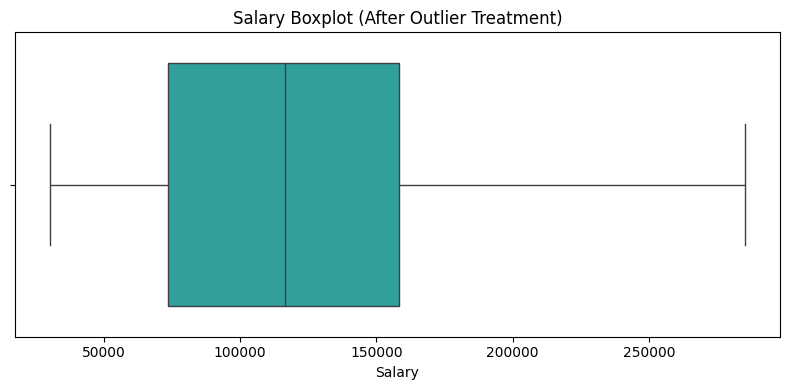

In [25]:
salary_boxplot_processed()